### QLD Votes 2020

The Queensland state election takes place on October 31, 2020. In the lead-up to the election, I built a hextile chart to display the state seat-by-seat. It is roughly geographical. This page demonstrates what it can do, via an analysis of how the state has swung in recent decades.

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import pickle
import collections

In [2]:
### import the position codes for our hextiles graph
hex2020 = pd.read_csv('Q2020hextiles.csv')

In [3]:
# some seats have changed name prior to 2017
# note that hill and macalister are not officially replacements for dalrymple and albert, but there is a lot of overlap
namechanges = {'cooper':'ashgrove', 'scenic rim': 'beaudesert','mcconnel': 'brisbane central','oodgeroo': 'cleveland',\
               'maiwar': 'indooroopilly', 'kurwongbah': 'kallangur','traeger': 'mount isa', 'toohey': 'sunnybank',\
               'miller': 'yeerongpilly', 'hill':'dalrymple', 'macalister': 'albert',}

namechangesrev = {v : k for k, v in namechanges.items()}

#abolished = ['mount coot-tha']  # there are others too, though we don't need to list any of themas they won't appear

newseats = ['bancroft', 'bonney', 'jordan', 'ninderry', 'theodore']

In [29]:
# a function to extract the relevant data fromeach election and transform it 

# WITH FULL COLOUR SCALE

def electionSwingPrepper(year):
    yeardf = pd.read_pickle(f"./{year}_2PP_seats.pkl")
    yeardf = yeardf[['Seat','winning party', 'winning pc']]
    yeardf.rename(columns={'Seat': 'Seat', 'winning party': f'winning party {year}', 'winning pc': f'winning pc {year}'}, inplace=True)
    
    # replace NLP and LIB as LNP, blanks as IND
    yeardf[f'winning party {year}'] = yeardf[f'winning party {year}'].replace(['NPA','LIB'], "LNP")
    yeardf[f'winning party {year}'] = yeardf[f'winning party {year}'].replace('', 'IND')

    
    yeardf[f'winning pc {year}'] = pd.to_numeric(yeardf[f'winning pc {year}'], errors='coerce')
    
    
    # set the color 
    yeardf[f'color{year}'] = 'white'       # for blanks
    
    def colorScaler(n,party):
        
        n = n/100    # because we are dealing with percentage numbers (0-100)
        n = (n - .5) * 2     # to normalize
        
        if party == "LNP":
            R = 0   
            G = 0.5 - (n**0.5/2)
            B = 1 - (n**0.5)/1.05
            
        elif party == 'ALP':
            R = 1 - (n**0.5)/1.05   
            G = 0
            B = 0
        
        elif party == "ONP":
            R = 1
            G = 1 - (n**0.5/2)
            B = 0
         
        elif party == "IND":
            R = 0.8-(n**0.5/2)
            G = R
            B = R
        
        elif party == "GRN":
            R = 0
            G = 1-(n**0.5/1.005)
            B = 0
            
        elif party == "KAP":
            R = 1-(n/2)
            G = 0.75-(n**2/2)
            B = 0.25
         
        else:
            
            R = 0.9
            B = 0.9
            G = 0.9
        
        c = R,G,B
        
        return c 
    
    clist = []
    for i,point in yeardf.iterrows():                
        pc = point[f'winning pc {year}']
        party = point[f'winning party {year}']
        
        c = colorScaler(pc, party)
    
        clist.append(c)
        
    yeardf[f'color{year}'] = clist



    # rename seats that need it
    yeardf.Seat = yeardf.Seat.replace(namechangesrev) 

    return yeardf

## 2017

This first example shows results from the 2017 elections, color-coded by party. The colors are on agradient that reflects the size of the parties win in that seat. The darker a seat, the safer it is. The lighter it is, the more margin it is.

In [30]:
year = '2017'
yeardf = electionSwingPrepper(year)

In [31]:
swingdf = yeardf.merge(hex2020, how="left")
swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y
0,algester,ALP,64.43,"(0.48836662786425533, 0, 0)",18.5,2.2
1,aspley,ALP,51.17,"(0.8543137281830631, 0, 0)",18.5,3.4
2,bancroft,ALP,56.21,"(0.6643617107294075, 0, 0)",17.0,3.7


([], <a list of 0 Text major ticklabel objects>)

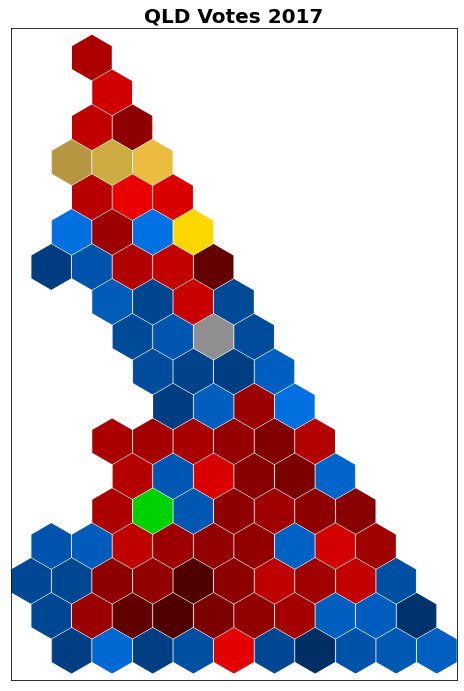

In [32]:
# map maker 

fig, ax = plt.subplots()
plt.title(f'QLD Votes 2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

Key:
* Red = ALP
* Blue = LNP 
* Orange = ONP
* Khaki = KAP
* Green = Green
* Grey = Independent

dark = safe, light = marginal

Note for following charts: abolished seats generally don't appear. In rare cases where there is significant overlap with a new seat they may be considered to be an extension of that seat (eg Tablelands does not show up as it was split evenly between three seats, but the new seat of hill includes voting from the older seat it had heavy overlap with)

# 2015 - 2017

This next hextile plot looks at how seats changed since the previous election. The inner hextile on each seat respresents the 2015 vote.

In [33]:
year = '2015'
yeardf = electionSwingPrepper(year)

In [34]:
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new
swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015
0,algester,ALP,64.43,"(0.48836662786425533, 0, 0)",18.5,2.2,ALP,56.99,"(0.6439063029363823, 0, 0)"
1,aspley,ALP,51.17,"(0.8543137281830631, 0, 0)",18.5,3.4,LNP,55.17,"(0, 0.3392206480918648, 0.6937536154130758)"
2,bancroft,ALP,56.21,"(0.6643617107294075, 0, 0)",17.0,3.7,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

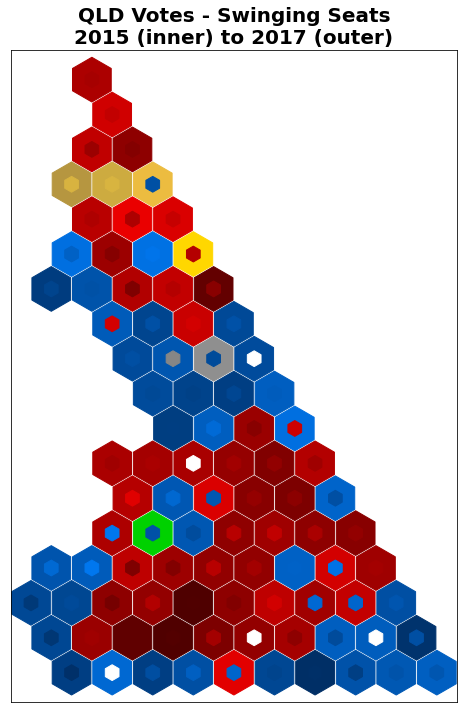

In [35]:
fig, ax = plt.subplots()
plt.title('QLD Votes - Swinging Seats\n2015 (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2015'])

plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

White = seat not in existence at that election

As you can see,most of SE Queensland shifted further to the left in 2017, making most red seats safer, causing some blue seats to become marginal, and in some cases, even changing hands. 

## SEATS GAINED IN 2017

This is a good chance to use the map to look specifically at seats gained in 2017. Some were news (as demonstrate by the white inner spaces above), others were direct gains.

In [36]:
swingdf['seat retained'] = np.where(swingdf['winning party 2017'] == swingdf['winning party 2015'],"Y","N")

swingdf[['Seat','winning party 2017','winning party 2015','seat retained']][0:10]

,Seat,winning party 2017,winning party 2015,seat retained
0,algester,ALP,ALP,Y
1,aspley,ALP,LNP,N
2,bancroft,ALP,NaN,N
3,barron river,ALP,ALP,Y
4,bonney,LNP,NaN,N
5,broadwater,LNP,LNP,Y
6,buderim,LNP,LNP,Y
7,bulimba,ALP,ALP,Y
8,bundaberg,LNP,ALP,N
9,bundamba,ALP,ALP,Y


In [37]:
t = []
for i, point in swingdf.iterrows(): 
    
    x = point['winning party 2017']
    y = point['winning party 2015']
    

    if x == y:
        color = 'lightgray'
        
    elif x == "ALP":
        color = 'tomato'
        
    elif x == "LNP":
        color = 'deepskyblue'
        
    elif x == "KAP":
        color = 'khaki'
        
    elif x == "GRN":
        color = 'springgreen'
        
    elif x == "ONP":
        color = 'orange'
        
       
    t.append(color)

swingdf['colorSR'] = t

In [38]:
swingdf[['Seat','winning party 2017','winning party 2015','seat retained', 'colorSR']]

,Seat,winning party 2017,winning party 2015,seat retained,colorSR
0,algester,ALP,ALP,Y,lightgray
1,aspley,ALP,LNP,N,tomato
2,bancroft,ALP,NaN,N,tomato
3,barron river,ALP,ALP,Y,lightgray
4,bonney,LNP,NaN,N,deepskyblue
...,...,...,...,...,...
88,traeger,KAP,KAP,Y,lightgray
89,warrego,LNP,LNP,Y,lightgray
90,waterford,ALP,ALP,Y,lightgray
91,whitsunday,LNP,LNP,Y,lightgray


In [39]:
swingdf = swingdf.merge(hex2020, how="left")

([], <a list of 0 Text major ticklabel objects>)

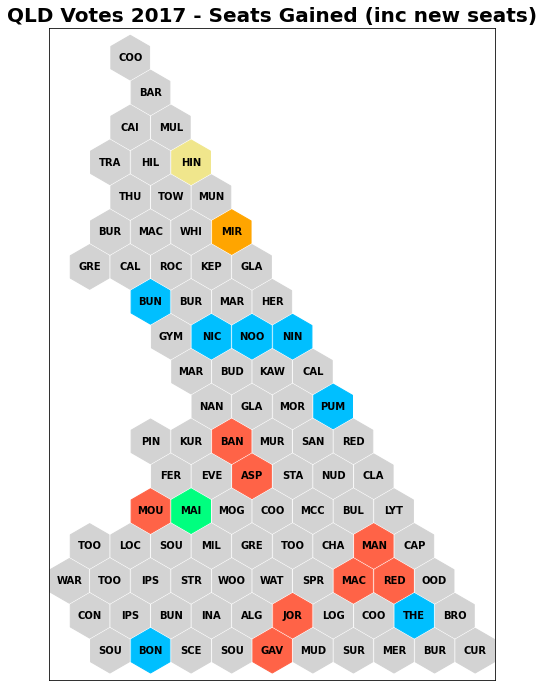

In [41]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Seats Gained (inc new seats)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSR'], )

for i, point in swingdf.iterrows():                
        #plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y'], point['Seat'][0:3].upper(),ha="center", va="center", weight="bold")
        
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

## SWINGS TOWARDS LABOR

We can also use the chart to show directly the strength of swings to - and away - from Labor in 2017.

In [48]:
t = []

for i, point in swingdf.iterrows():
    
    if point['winning party 2015'] == "--":
        swingALP = '--'
        
    else:
        
        if point['winning party 2017'] == 'ALP':
            now = float(point['winning pc 2017'])
            
        else:
            now = 100.0 - float(point['winning pc 2017'])
                     
        if point['winning party 2015'] == 'ALP':
                then = float(point['winning pc 2015'])
        else:
                then = 100.0 - float(point['winning pc 2015'])
            
        swingALP = round(now - then,2)
                
    t.append(swingALP)

swingdf['swingALP'] = t

swingdf.head(10)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,seat retained,colorSR,swingALP,colorSwingALP
0,algester,ALP,64.43,"(0.48836662786425533, 0, 0)",18.5,2.2,ALP,56.99,"(0.6439063029363823, 0, 0)",Y,lightgray,7.44,tomato
1,aspley,ALP,51.17,"(0.8543137281830631, 0, 0)",18.5,3.4,LNP,55.17,"(0, 0.3392206480918648, 0.6937536154130758)",N,tomato,6.34,tomato
2,bancroft,ALP,56.21,"(0.6643617107294075, 0, 0)",17.0,3.7,NaN,NaN,white,N,tomato,NaN,tomato
3,barron river,ALP,51.86,"(0.8163114140763249, 0, 0)",11.0,6.7,ALP,53.12,"(0.7620953143467277, 0, 0)",Y,lightgray,-1.26,lightsteelblue
4,bonney,LNP,51.69,"(0, 0.40807611844574876, 0.8249068922776166)",11.0,1.9,NaN,NaN,white,N,deepskyblue,NaN,lightsteelblue
5,broadwater,LNP,67.98,"(0, 0.20016671298870092, 0.4288889771213351)",33.5,2.2,LNP,57.19,"(0, 0.31039514774141463, 0.6388479004598374)",Y,lightgray,-10.79,navy
6,buderim,LNP,61.41,"(0, 0.26114858175007627, 0.5450449176191929)",17.0,4.3,LNP,62.16,"(0, 0.25342343988124105, 0.5303303616785544)",Y,lightgray,0.75,salmon
7,bulimba,ALP,60.78,"(0.5577833612859466, 0, 0)",26.0,3.1,ALP,56.14,"(0.6662587529917099, 0, 0)",Y,lightgray,4.64,tomato
8,bundaberg,LNP,54.20,"(0, 0.35508623253810556, 0.7239737762630583)",11.0,4.9,ALP,51.62,"(0.8285714285714286, 0, 0)",N,deepskyblue,-5.82,deepskyblue
9,bundamba,ALP,71.55,"(0.37475628334591027, 0, 0)",12.5,2.2,ALP,71.43,"(0.3764995313016034, 0, 0)",Y,lightgray,0.12,salmon


In [43]:
r = []

for i in t: 
        
    if i ==  '--':
        color = 'lightgrey'
                   
    elif i == 0:
        color = 'white'
        
    elif i > 8:
        color = 'darkred'
        
    elif i > 4:
        color = 'tomato'
        
    elif i > 0:
        color = 'salmon'
        
    elif i < -8:
        color = 'navy'
        
    elif i < -4:
        color = 'deepskyblue'
        
    elif i < 0:
        color = 'lightsteelblue'
       
    r.append(color)

swingdf['colorSwingALP'] = r

([], <a list of 0 Text major ticklabel objects>)

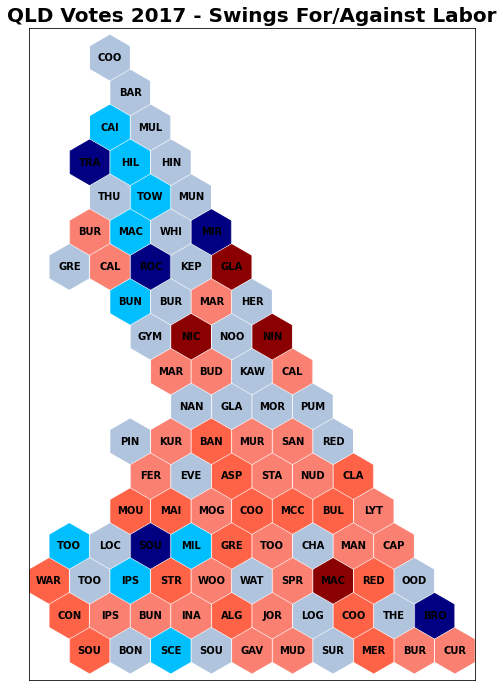

In [44]:
fig, ax = plt.subplots()
plt.title('QLD Votes 2017 - Swings For/Against Labor', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=2000, c=swingdf['colorSwingALP'], )

for i, point in swingdf.iterrows():                
        #plt.text(point['x'], point['y']-0.05, point['swing'],ha="center", va="center", weight="bold")
        plt.text(point['x'], point['y'], point['Seat'][0:3].upper(),ha="center", va="center", weight="bold")
        
plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

This chart really highights the seats that bucked the trend. While most of the south moved towards the ALP, South Brisbane swung sharply towards the Greens. (A future update of this should make this a green - not blue - color. Broadwater also had a swing of over 10 per cent, though this may be due to a redrawing of the electoral boundary.

It is also easier to observe from this chart that Labor's seats in the very north drifted slightly to the right, even if they stayed in the ALP's possession. Indeed, the 2017 election was characrtised by the difference in directional swings between the north and south. 

### 2001 - 2017

The following charts take the 'inner hex' idea and show a 'tree ring' of previous results, going back to the start of the century. 

In [49]:
#gather data for 2012, 2009, 2006, 2004, 2001

year = '2012'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new

In [50]:
year = '2009'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new

In [51]:
year = '2006'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new

In [52]:
year = '2004'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new

In [53]:
year = '2001'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are new
swingdf

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,seat retained,...,color2009,winning party 2006,winning pc 2006,color2006,winning party 2004,winning pc 2004,color2004,winning party 2001,winning pc 2001,color2001
0,algester,ALP,64.43,"(0.48836662786425533, 0, 0)",18.5,2.2,ALP,56.99,"(0.6439063029363823, 0, 0)",Y,...,"(0.5912521193547633, 0, 0)",ALP,67.84,"(0.431116780073597, 0, 0)",ALP,67.97,"(0.4290478176258339, 0, 0)",ALP,72.6,"(0.359705283277272, 0, 0)"
1,aspley,ALP,51.17,"(0.8543137281830631, 0, 0)",18.5,3.4,LNP,55.17,"(0, 0.3392206480918648, 0.6937536154130758)",N,...,"(0, 0.35066815476931923, 0.7155583900367986)",ALP,54.61,"(0.7108147342725908, 0, 0)",ALP,54.32,"(0.7200583151104939, 0, 0)",ALP,54.7,"(0.7080055292046495, 0, 0)"
2,bancroft,ALP,56.21,"(0.6643617107294075, 0, 0)",17.0,3.7,NaN,NaN,white,N,...,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white
3,barron river,ALP,51.86,"(0.8163114140763249, 0, 0)",11.0,6.7,ALP,53.12,"(0.7620953143467277, 0, 0)",Y,...,"(0.7948508644901142, 0, 0)",ALP,55.14,"(0.6946434372974972, 0, 0)",ALP,53.12,"(0.7620953143467277, 0, 0)",ALP,57.3,"(0.6360957490563277, 0, 0)"
4,bonney,LNP,51.69,"(0, 0.40807611844574876, 0.8249068922776166)",11.0,1.9,NaN,NaN,white,N,...,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,traeger,KAP,78.49,"(0.7151000000000001, 0.5876639800000001, 0.25)",8.0,6.1,KAP,65.19,"(0.8481000000000001, 0.7038527800000001, 0.25)",Y,...,"(0.6778755328516617, 0, 0)",ALP,62.28,"(0.528018602157567, 0, 0)",ALP,64.15,"(0.49335481606588993, 0, 0)",ALP,66.2,"(0.4578952582568492, 0, 0)"
96,warrego,LNP,59.46,"(0, 0.28251436829068455, 0.5857416538870182)",5.0,2.5,LNP,65.43,"(0, 0.2222411117533769, 0.4709354509588132)",Y,...,"(0, 0.1511447291497518, 0.3355137698090511)",LNP,73.34,"(0, 0.15838618294922552, 0.34930701514138196)",LNP,74.76,"(0, 0.14814775828481636, 0.3298052538758407)",NAP,50.3,"(0.9, 0.9, 0.9)"
97,waterford,ALP,60.75,"(0.5583991192621093, 0, 0)",20.0,2.5,ALP,63.33,"(0.5082540707266445, 0, 0)",Y,...,"(0.4535623509416743, 0, 0)",ALP,65.85,"(0.4637833043710763, 0, 0)",ALP,66.52,"(0.4525673194971461, 0, 0)",ALP,68.0,"(0.4285714285714285, 0, 0)"
98,whitsunday,LNP,50.68,"(0, 0.44169048105154685, 0.8889342496219941)",14.0,5.5,LNP,50.38,"(0, 0.4564110105645931, 0.9169733534563679)",Y,...,"(0.7575633893074695, 0, 0)",ALP,54.36,"(0.7187652750431734, 0, 0)",ALP,64.77,"(0.4823741622209071, 0, 0)",ALP,59.6,"(0.5826875752341591, 0, 0)"


([], <a list of 0 Text major ticklabel objects>)

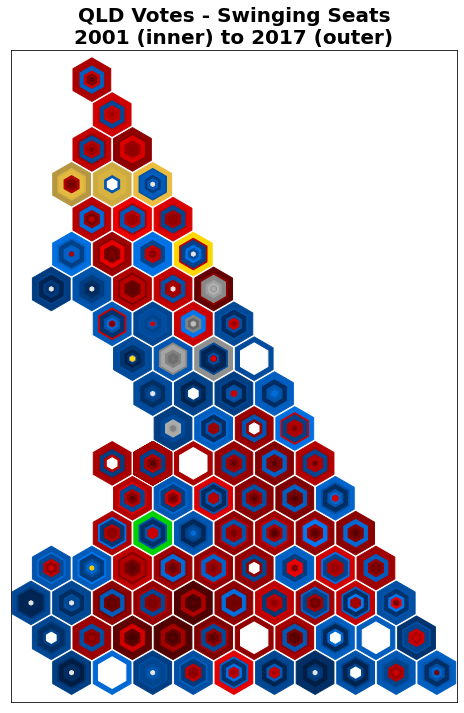

In [54]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1900, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=750, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=300, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=125, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=40, c=swingdf['color2004'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=20, c=swingdf['color2001'])


plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

A 'tree rings' version makes the business of all this data a bit easier on the eye (and is more metaphoricall neat).

([], <a list of 0 Text major ticklabel objects>)

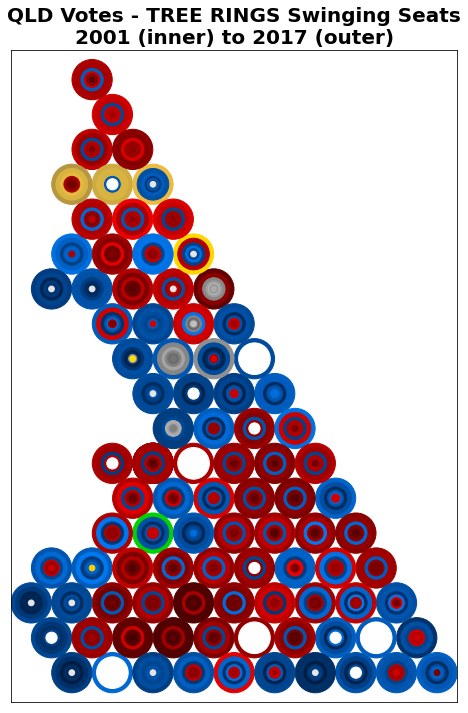

In [56]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - TREE RINGS Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=1620, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=1000, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=500, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=250, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=125, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=67, c=swingdf['color2004'])

ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=33, c=swingdf['color2001'])


plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

A more artistic touch is achieved by rotating alternate hexs.

([], <a list of 0 Text major ticklabel objects>)

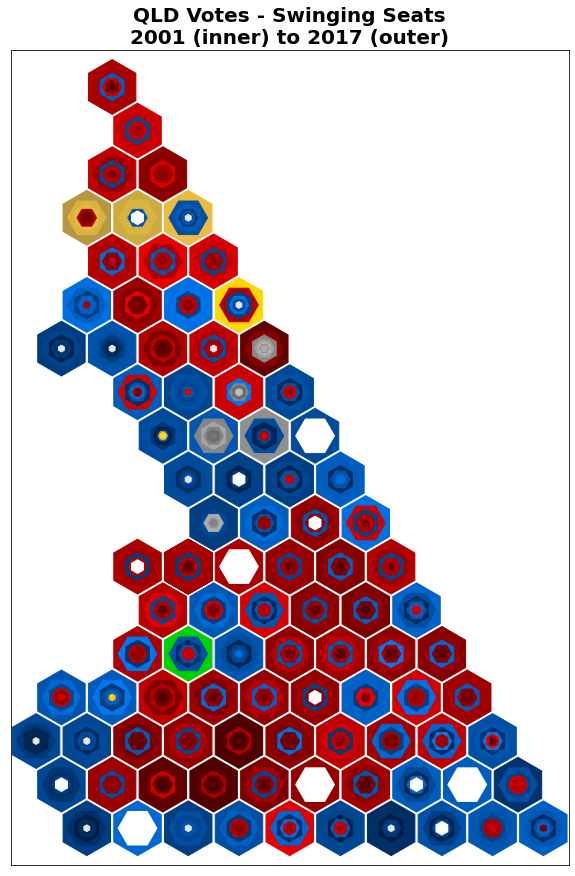

In [59]:
fig, ax = plt.subplots()
plt.title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=3000, c=swingdf['color2017'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=1500, c=swingdf['color2015'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=750, c=swingdf['color2012'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=375, c=swingdf['color2009'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=187, c=swingdf['color2006'])

ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=93, c=swingdf['color2004'])

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=46, c=swingdf['color2001'])


plt.rcParams['figure.figsize'] = (10, 15) 
plt.xticks([])
plt.yticks([])

## SEATS CHANGING HANDS VERSION

These previous hextiles were quite busy. In this alteration, all that matters os who won the seat - not the margin.

In [63]:
# neutralize some of the colors 

def colorUpdater(year):
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'ALP', 'red', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'LNP', 'blue', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'ONP', 'orange', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'KAP', 'khaki', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'GRN', 'springgreen', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'IND', 'lightgray', swingdf[f'color{year}'])

colorUpdater('2017')
colorUpdater('2015')
colorUpdater('2012')
colorUpdater('2009')
colorUpdater('2006')
colorUpdater('2004')
colorUpdater('2001')

swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,seat retained,...,color2009,winning party 2006,winning pc 2006,color2006,winning party 2004,winning pc 2004,color2004,winning party 2001,winning pc 2001,color2001
0,algester,ALP,64.43,red,18.5,2.2,ALP,56.99,red,Y,...,red,ALP,67.84,red,ALP,67.97,red,ALP,72.6,red
1,aspley,ALP,51.17,red,18.5,3.4,LNP,55.17,blue,N,...,blue,ALP,54.61,red,ALP,54.32,red,ALP,54.7,red
2,bancroft,ALP,56.21,red,17.0,3.7,NaN,NaN,white,N,...,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

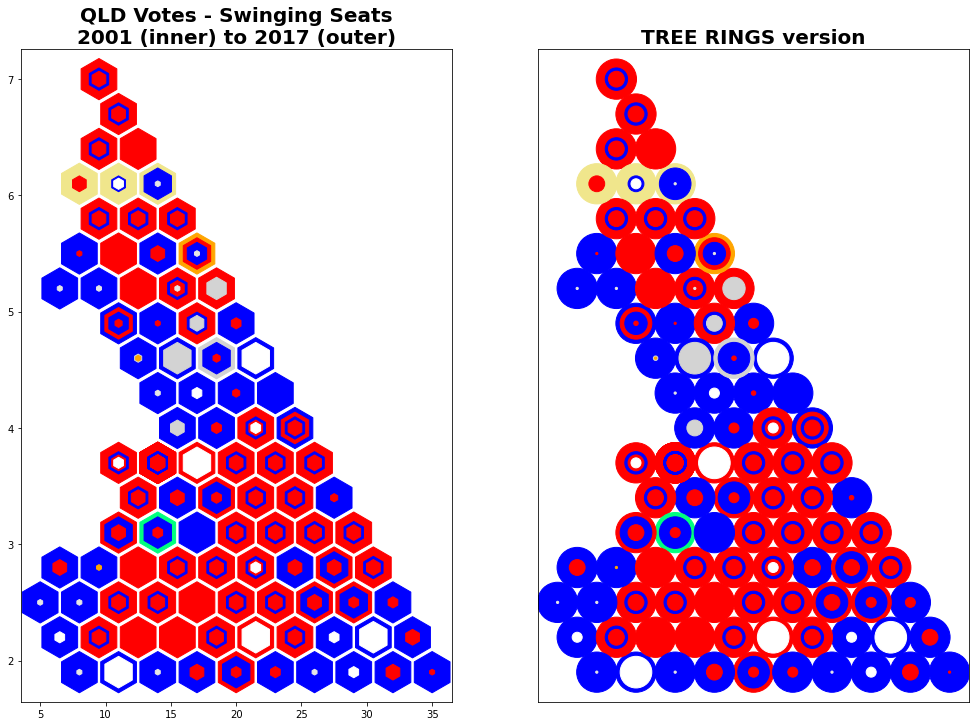

In [64]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1]})

# hextiles version

ax[0].set_title(f'QLD Votes - Swinging Seats\n{year} (inner) to 2017 (outer)', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=1700, c=swingdf['color2017'])
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2012'])
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2009'])
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=125, c=swingdf['color2006'])
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=67, c=swingdf['color2004'])
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=33, c=swingdf['color2001'])



# tree rings version

ax[1].set_title(f'TREE RINGS version', fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=1620, c=swingdf['color2017'])
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=1000, c=swingdf['color2015'])
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=500, c=swingdf['color2012'])
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=250, c=swingdf['color2009'])
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=100, c=swingdf['color2006'])
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=20, c=swingdf['color2004'])
ax[1].scatter(swingdf['x'], swingdf['y'], marker='o', s=5, c=swingdf['color2001'])

plt.rcParams['figure.figsize'] = (17, 12) 
plt.xticks([])
plt.yticks([])

With less information, the data is easier to read. (It's les psychadelic, but still has a 70s aesthetic).

What they both highlight is the anomaly that was 2012 - the blue ring inide the red seats - when Labor suffered a landlisde defeat. It was a one off. As the version of this plot that excludes that vote shows, seats in Qld have been fairly stable. 

([], <a list of 0 Text major ticklabel objects>)

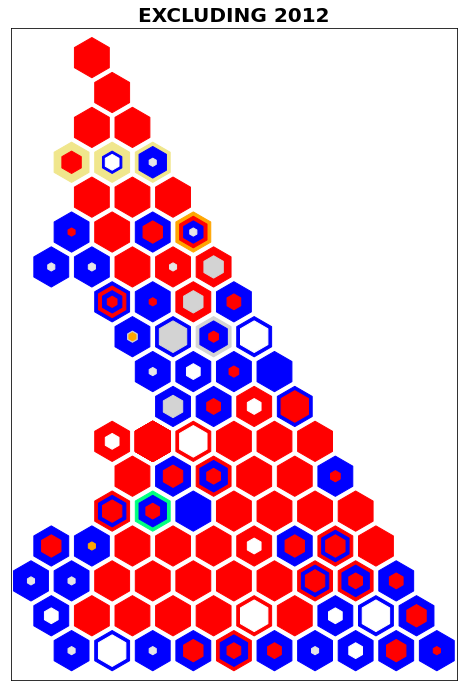

In [66]:
# excluding 2012 - which seems like an anomaly

fig, ax = plt.subplots()
plt.title(f'EXCLUDING 2012', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1620, c=swingdf['color2017'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1000, c=swingdf['color2015'])
#ax.scatter(swingdf['x'], swingdf['y'], marker='o', s=500, c=swingdf['color2012'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=500, c=swingdf['color2009'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=250, c=swingdf['color2006'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=125, c=swingdf['color2004'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=67, c=swingdf['color2001'])


plt.rcParams['figure.figsize'] = (8, 12) 
plt.xticks([])
plt.yticks([])

### LET'S GO WAY BACK...

As the 'binary' version is less busy, it makes it easier to add even more elections. Let's go back to 1992, the election that ended the reign of Sir Joh.

In [67]:
year = '1998'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are 

In [68]:
year = '1995'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are 

In [69]:
year = '1992'
yeardf = electionSwingPrepper(year)
swingdf = swingdf.merge(yeardf, how="left")
swingdf[f'color{year}'] = swingdf[f'color{year}'].replace(np.nan, 'white')    # for seats that are 

In [70]:
def colorUpdater(year):
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'ALP', 'red', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'LNP', 'blue', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'ONP', 'orange', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'KAP', 'khaki', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'GRN', 'springgreen', swingdf[f'color{year}'])
    swingdf[f'color{year}'] = np.where(swingdf[f'winning party {year}'] == 'IND', 'lightgray', swingdf[f'color{year}'])

colorUpdater('1998')
colorUpdater('1995')
colorUpdater('1992')

swingdf.head(3)

,Seat,winning party 2017,winning pc 2017,color2017,x,y,winning party 2015,winning pc 2015,color2015,seat retained,...,color2001,winning party 1998,winning pc 1998,color1998,winning party 1995,winning pc 1995,color1995,winning party 1992,winning pc 1992,color1992
0,algester,ALP,64.43,red,18.5,2.2,ALP,56.99,red,Y,...,red,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white
1,aspley,ALP,51.17,red,18.5,3.4,LNP,55.17,blue,N,...,red,LNP,51.8,blue,LNP,56.9,blue,LNP,50.9,blue
2,bancroft,ALP,56.21,red,17.0,3.7,NaN,NaN,white,N,...,white,NaN,NaN,white,NaN,NaN,white,NaN,NaN,white


([], <a list of 0 Text major ticklabel objects>)

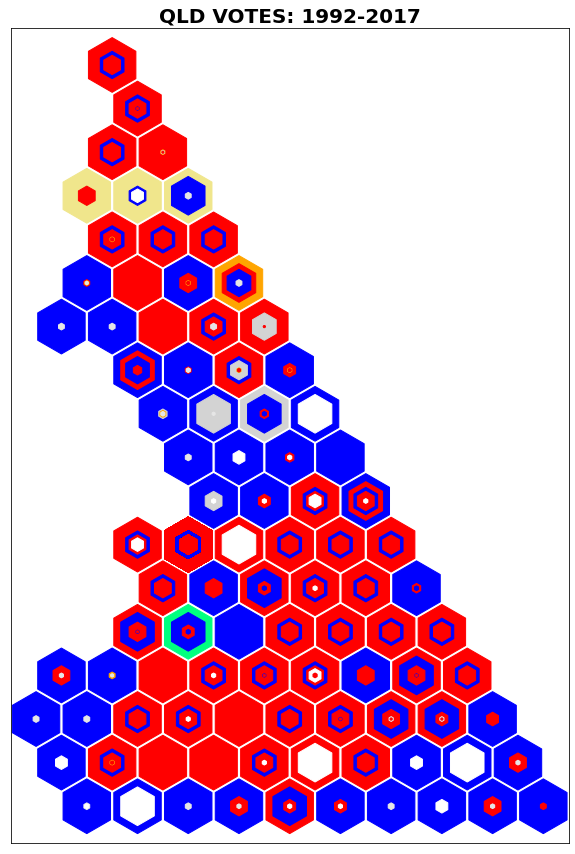

In [88]:
fig, ax = plt.subplots()
plt.title(f'QLD VOTES: 1992-2017', fontdict={'fontsize': 20, 'fontweight': 'bold'})

ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=3000, c=swingdf['color2017'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=1500, c=swingdf['color2015'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=750, c=swingdf['color2012'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=375, c=swingdf['color2009'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=187, c=swingdf['color2006'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=93, c=swingdf['color2004'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=46, c=swingdf['color2001'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=23, c=swingdf['color1998'])
ax.scatter(swingdf['x'], swingdf['y'], marker='h', s=12, c=swingdf['color1995'])
ax.scatter(swingdf['x'], swingdf['y'], marker='H', s=6, c=swingdf['color1992'])


plt.rcParams['figure.figsize'] = (10, 15) 
plt.xticks([])
plt.yticks([])

This further highlights what an anomaly 2012 was. Labor was reduced to just 7 seats, barely enough to form an opposition. Yet it was the only one of the 10 elections in that period that it had lost.

So much for the federal theory that Labor can't win Qld.

# WINNINGEST SEATS

That dominance is really reflected when we look at the frequency of the major parties winning each seat.

In [79]:
freqdf = swingdf[['Seat','winning party 2017','winning party 2015','winning party 2012','winning party 2009','winning party 2006','winning party 2004', 'winning party 2001','winning party 1998','winning party 1995','winning party 1992']]

In [80]:

# find out how many times each party has held the seats

ALPall = []
ALPpc = []
LNPall = []
LNPpc = []
seatsum = []
for index, rows in freqdf.iterrows():
    x = rows.values
    y = collections.Counter(x)
    yALP = y['ALP']
    yLNP = y['LNP']
    yIND = y['IND']
    yONP = y['ONP']
    yKAP = y['KAP']
    yGRN = y['GRN']
    ySUM = yALP + yLNP + yIND + yONP + yKAP + yGRN
    yALPpc = round(yALP/ySUM,2)
    yLNPpc = round(yLNP/ySUM,2)
    ALPall.append(yALP)
    ALPpc.append(yALPpc)
    LNPall.append(yLNP)
    LNPpc.append(yLNPpc)
    seatsum.append(ySUM)

In [81]:
# setting ALP colors

def colorScaler(n): 
    
    if n < 0.4:
        R = 1
        B = 0.6 - n
        G = 0.6 - n
        
    else:
        R = 1 - (n - 0.4)
        B = 0.1
        G = 0.1
        
    c = R,G,B
    
    return c

clist = []
for n in ALPpc:
    c = colorScaler(n)
    clist.append(c)
    
# setting text colors

def colorScalerForText(n): 
    
    R = 1 - ((1 - (n ** .5)) / 5)
    B = 1 - ((1 - (n ** .5)) / 5)
    G = 1 - ((1 - (n ** .5)) / 5)
    
    t = R,G,B
    return t

tlist = []
for n in ALPpc:
    t = colorScalerForText(n)
    tlist.append(t)
    
len(clist)

156

In [82]:
# setting LNP colors

def colorScaler(n): 
    
    if n < 0.5:
        R = 1 - (n * 2)
        B = 1
        G = 1 - (n * 2)
        
    else:
        R = 0
        B = 1 - (n - 0.5)
        G = 0
        
    c = R,G,B
    
    return c

dlist = []
for n in LNPpc:
    d = colorScaler(n)
    dlist.append(d)
    
# setting text colors

def colorScalerForText(n): 
    
    R = 1 - ((1 - (n ** .5)) / 5)
    B = 1 - ((1 - (n ** .5)) / 5)
    G = 1 - ((1 - (n ** .5)) / 5)
    
    t = R,G,B
    return t

vlist = []
for n in LNPpc:
    v = colorScalerForText(n)
    vlist.append(t)

In [83]:
freqdf = freqdf.copy()                 # this stops the annoying error message
freqdf['seatsum'] = seatsum
freqdf['ALPpc'] = ALPpc
freqdf['ALPall'] = ALPall
freqdf['LNPpc'] = LNPpc
freqdf['LNPall'] = LNPall
freqdf['colorALP'] = clist
freqdf['colortextALP'] = tlist
freqdf['colorLNP'] = dlist
freqdf['colortextLNP'] = vlist

freqdf['colorALP'] = np.where(freqdf['ALPall'] == 0, 'lightsteelblue',freqdf['colorALP'])
freqdf['colorLNP'] = np.where(freqdf['LNPall'] == 0, 'wheat',freqdf['colorLNP'])
freqdf['colortextALP'] = np.where(freqdf['ALPall'] == 0, 'grey',freqdf['colortextALP'])

freqdf = freqdf.merge(hex2020, how="left")

freqdf.head(2)

,Seat,winning party 2017,winning party 2015,winning party 2012,winning party 2009,winning party 2006,winning party 2004,winning party 2001,winning party 1998,winning party 1995,...,ALPpc,ALPall,LNPpc,LNPall,colorALP,colortextALP,colorLNP,colortextLNP,x,y
0,algester,ALP,ALP,LNP,ALP,ALP,ALP,ALP,NaN,NaN,...,0.86,6,0.14,1,"(0.54, 0.1, 0.1)","(0.985472369909914, 0.985472369909914, 0.98547...","(0.72, 0.72, 1)","(1.0, 1.0, 1.0)",18.5,2.2
1,aspley,ALP,LNP,LNP,LNP,ALP,ALP,ALP,LNP,LNP,...,0.40,4,0.60,6,"(1.0, 0.1, 0.1)","(0.9264911064067352, 0.9264911064067352, 0.926...","(0, 0, 0.9)","(1.0, 1.0, 1.0)",18.5,3.4


([], <a list of 0 Text major ticklabel objects>)

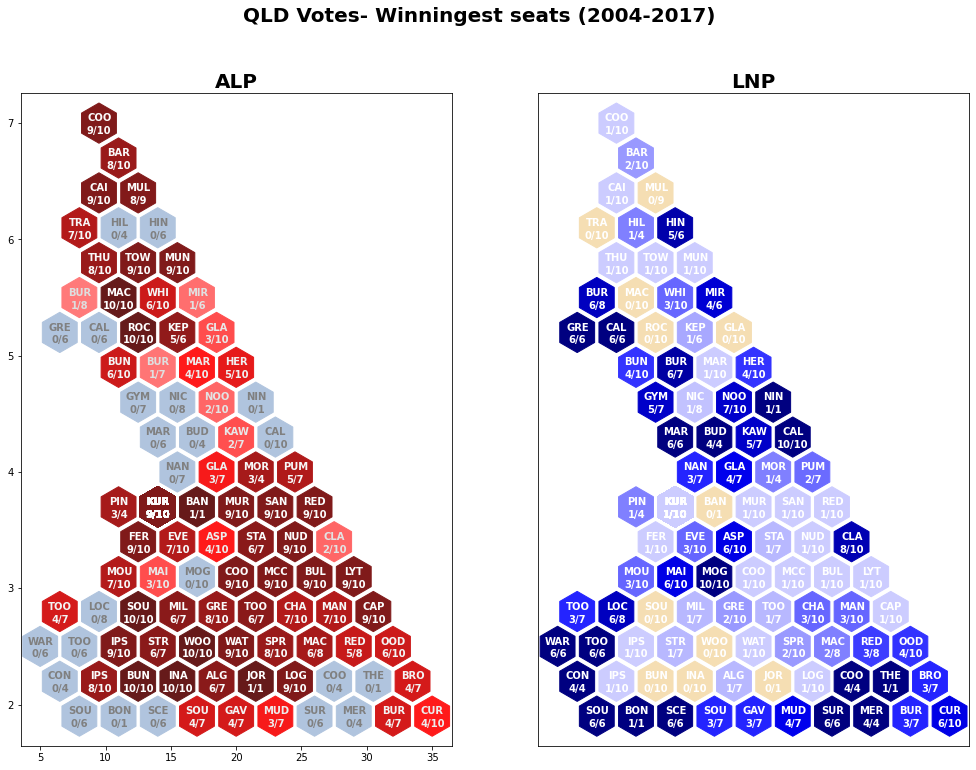

In [85]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1,1]})

plt.suptitle(f"QLD Votes- Winningest seats (2004-2017)", fontsize= 20, fontweight= 'bold')

ax[0].set_title(f"ALP", fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax[0].scatter(swingdf['x'], swingdf['y'], marker='h', s=1620, c=freqdf['colorALP'])
for i, point in freqdf.iterrows():
        text1 = f'{point["ALPall"]}/{point["seatsum"]}'
        ax[0].text(point['x']+0.025, point['y']-0.025, text1, ha="center", va="top", c=point['colortextALP'], weight="bold")
        ax[0].text(point['x']+0.025, point['y'], point['Seat'][0:3].upper(), ha="center", va="bottom",c=point['colortextALP'], weight="bold")
        
ax[1].set_title(f"LNP", fontdict={'fontsize': 20, 'fontweight': 'bold'})
ax[1].scatter(swingdf['x'], swingdf['y'], marker='h', s=1620, c=freqdf['colorLNP'])
for i, point in freqdf.iterrows():
        text1 = f'{point["LNPall"]}/{point["seatsum"]}'
        ax[1].text(point['x']+0.025, point['y']-0.025, text1, ha="center", va="top", c=point['colortextLNP'], weight="bold")
        ax[1].text(point['x']+0.025, point['y'], point['Seat'][0:3].upper(), ha="center", va="bottom",c=point['colortextLNP'], weight="bold")
        

plt.rcParams['figure.figsize'] = (17, 12) 
plt.xticks([])
plt.yticks([])